Question 2_i. Layout 1:


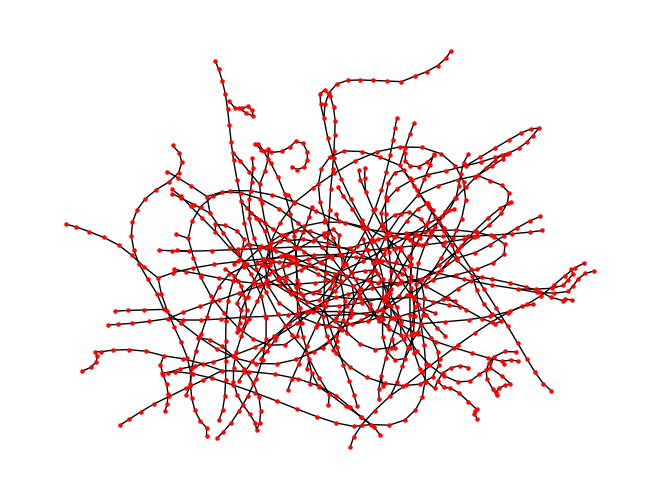

Question 2_ii. Layout 2:


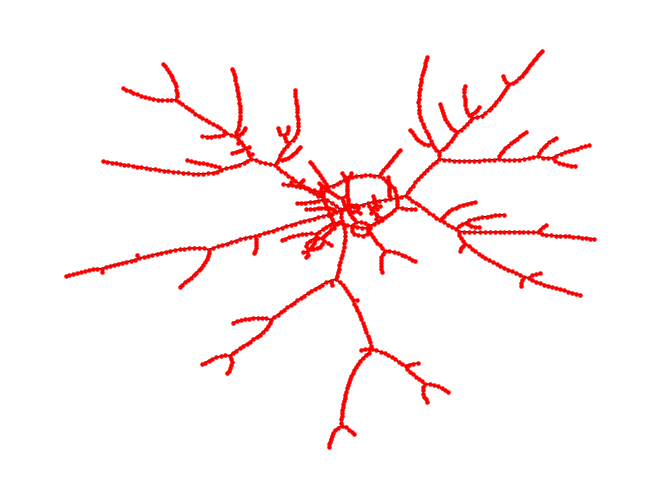

Question 3. Calculate the Degree Distribution:
Average Degree: 2.00


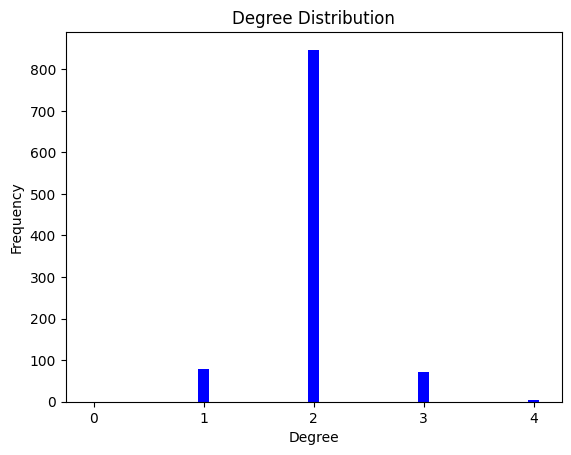

Question 3_i. Assign sizes to vertices based on their total degree:


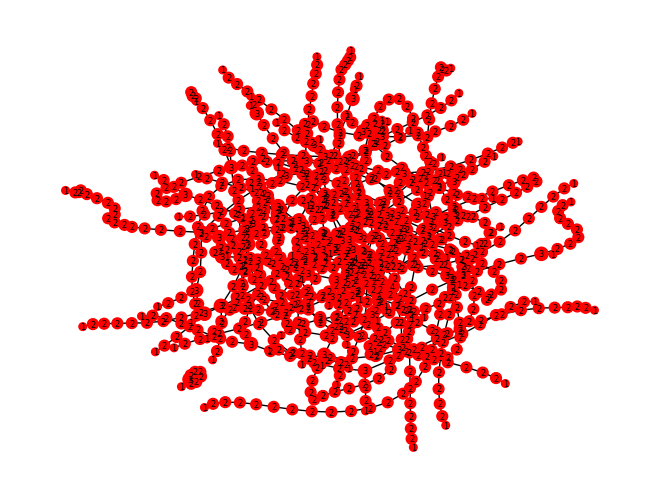

Question 4_i. Bottom 10% of nodes and the connection among them are visible:


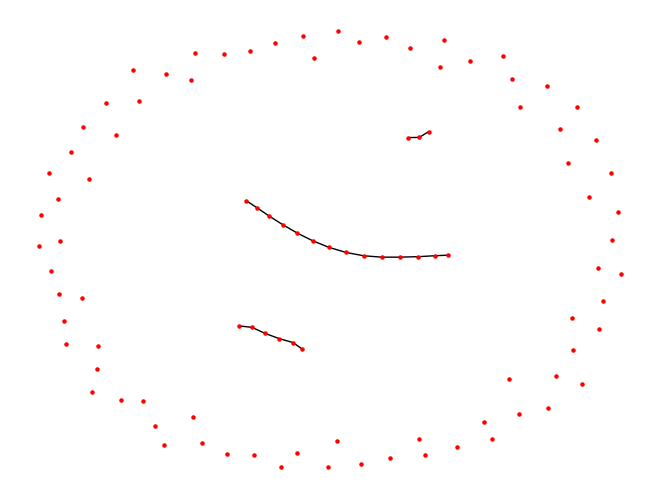

Question 4_ii. Top 5% of nodes and the connections among them are visible:


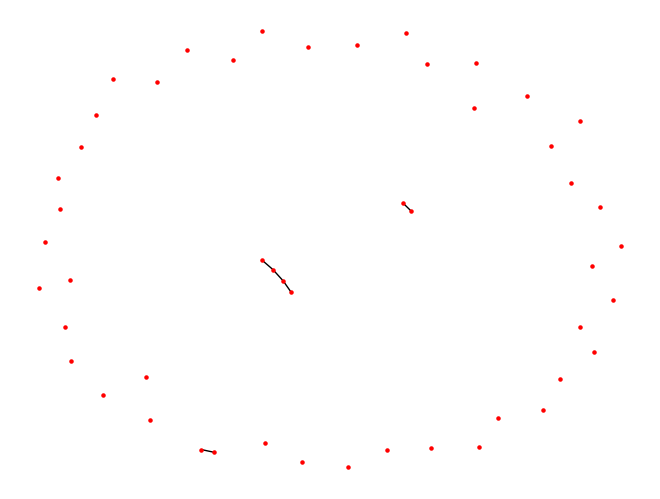

Question 5_i. All the connected components of the network:


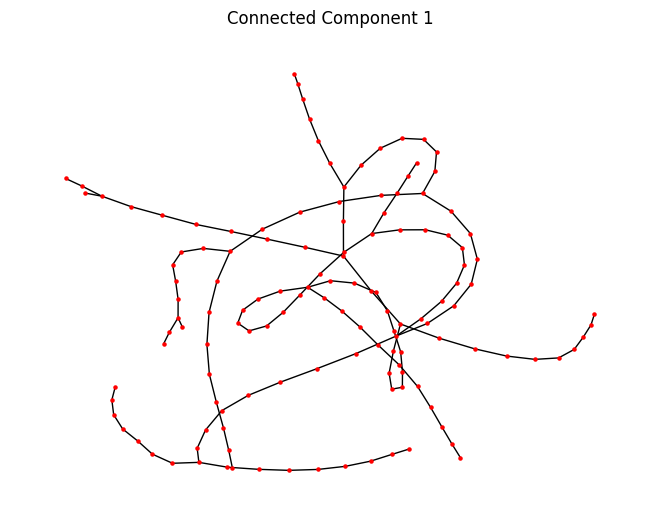

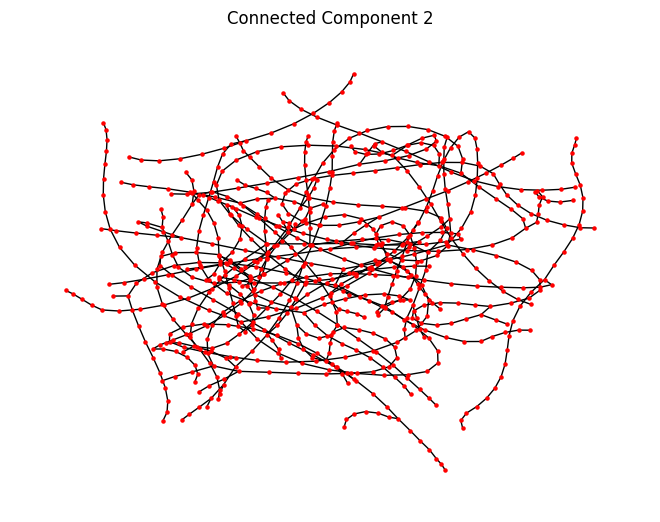

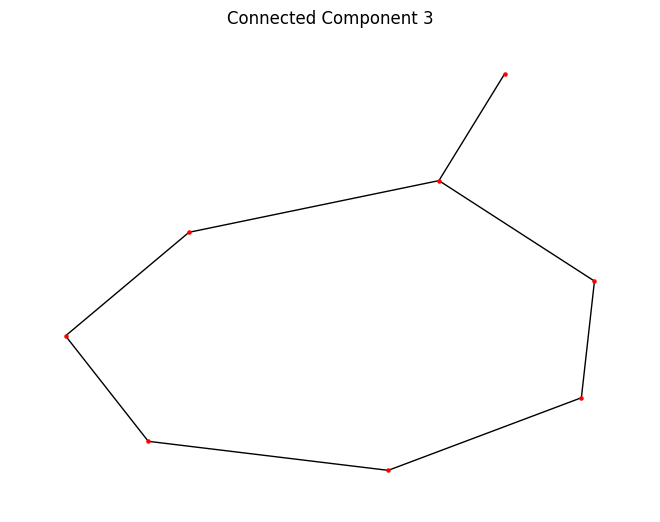

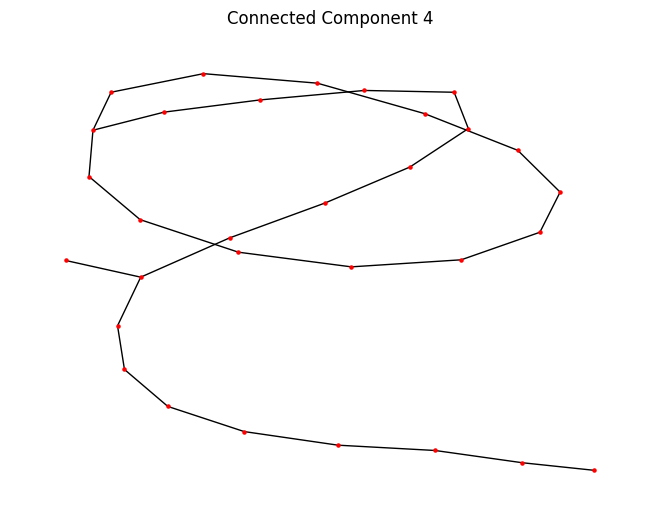

Question 5_ii. The size of the giant component of the network:


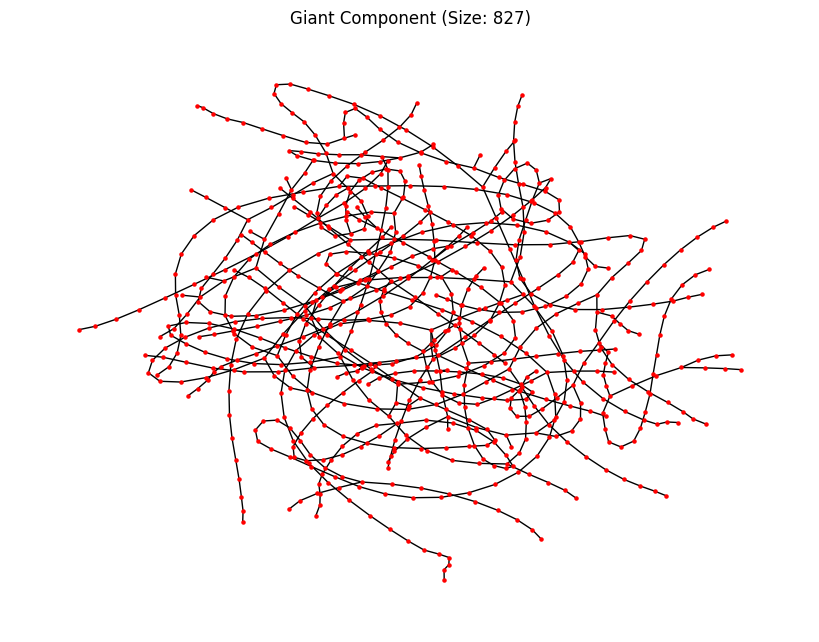

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph_1(G):
    position = nx.spring_layout(G)  # Spring Layout
    nx.draw(G, position, node_size=5, node_color='red')
    plt.show()

def visualize_graph_2(G):
    position = nx.kamada_kawai_layout(G)  # Kamada Kawai Layout
    nx.draw(G, position, node_size=5, node_color='red')
    plt.show()

def plot_degree_distribution(G):
    degrees = dict(G.degree())
    degree_values = list(degrees.values())
    degree_histogram = nx.degree_histogram(G)
    plt.bar(range(len(degree_histogram)), degree_histogram, width=0.1, color='blue')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution')
    average_degree = sum(degree_values) / len(G.nodes())  # Calculating average degree
    print(f"Average Degree: {average_degree:.2f}")
    plt.show()

def visualize_graph_with_degrees(G):
    position = nx.spring_layout(G)
    degrees = dict(G.degree())
    node_sizes = [deg * 30 for deg in degrees.values()]
    nx.draw(G, position, node_size=node_sizes, node_color='red')
    nx.draw_networkx_labels(G, position, labels=degrees, font_size=6)
    plt.show()

def visualize_bottom_10_percent(G):
    degrees = dict(G.degree())
    sorted_nodes = sorted(degrees, key=lambda x: degrees[x])
    num_nodes = len(sorted_nodes)
    bottom_10_percent = sorted_nodes[:int(num_nodes * 0.1)]
    subgraph = G.subgraph(bottom_10_percent)
    position = nx.spring_layout(subgraph)
    nx.draw(subgraph, position, node_size=5, node_color='red')
    plt.show()

def visualize_top_5_percent(G):
    degrees = dict(G.degree())
    sorted_nodes = sorted(degrees, key=lambda x: degrees[x], reverse=True)
    num_nodes = len(sorted_nodes)
    top_5_percent = sorted_nodes[:int(num_nodes * 0.05)]
    subgraph = G.subgraph(top_5_percent)
    position = nx.spring_layout(subgraph)
    nx.draw(subgraph, position, node_size=5, node_color='red')
    plt.show()

def visualize_connected_components(G):
    connected_components = list(nx.connected_components(G))
    for i, component in enumerate(connected_components):
        subgraph = G.subgraph(component)
        position = nx.spring_layout(subgraph)
        plt.figure(i + 1)
        nx.draw(subgraph, position, node_size=5, node_color='red')
        plt.title(f"Connected Component {i + 1}")
    plt.show()

def visualize_giant_component(G):
    largest_component = max(nx.connected_components(G), key=len)
    giant_component = G.subgraph(largest_component)
    position = nx.spring_layout(giant_component)
    node_size = 5
    plt.figure(figsize=(8, 6))
    nx.draw(giant_component, position, node_size=node_size, node_color='red')
    plt.title(f"Giant Component (Size: {len(largest_component)})")
    plt.show()

if __name__ == "__main__":

    # Edges dataset of the graph
    edge_list = [
"0 1", "0 999", "1 2", "2 3", "3 4", "4 432", "5 6", "6 389", "7 8", "7 738", "8 9", "9 10", "10 11", "11 12", "12 13", "13 14", "14 15", "15 16", "16 17", "17 18", "18 19", "19 20", "20 21", "21 22", "22 23", "23 24", "24 25", "25 62", "26 27", "27 28", "28 29", "29 30", "30 31", "31 32", "32 33", "33 34", "34 35", "35 36", "36 37", "37 38", "38 39", "39 528", "40 41", "41 42", "42 43", "43 44", "44 45", "45 46", "46 771", "46 47", "47 48", "48 49", "49 50", "50 51", "51 52", "52 53", "53 214", "53 54", "54 55", "55 56", "56 57", "57 58", "58 59", "59 60", "60 61", "61 62", "62 543", "62 63", "63 64", "64 65", "65 66", "66 67", "67 68", "68 69", "69 70", "70 71", "71 72", "72 73", "73 74", "74 75", "75 76", "76 588", "77 78", "78 79", "79 80", "80 81", "81 82", "82 83", "83 217", "83 84", "84 85", "85 578", "86 155", "86 87", "87 367", "88 89", "89 90", "90 91", "91 92", "92 93", "93 94", "94 95", "95 96", "96 847", "97 741", "98 151", "99 100", "100 106", "100 101", "101 102", "102 103", "103 104", "104 105", "105 106", "107 108", "108 109", "109 110", "110 111", "111 112", "112 113", "113 114", "114 115", "115 116", "116 117", "117 118", "118 119", "119 120", "120 121", "121 122", "122 123", "123 408", "123 124", "124 125", "125 126", "126 127", "127 751", "128 129", "129 130", "130 131", "131 132", "132 133", "133 134", "134 135", "135 136", "136 137", "137 138", "138 139", "139 140", "140 141", "141 142", "142 143", "143 144", "144 145", "145 146", "146 147", "147 148", "148 207", "149 150", "150 151", "151 152", "152 153", "153 154", "154 155", "156 157", "157 158", "158 441", "158 159", "159 160", "160 161", "161 162", "162 163", "163 164", "164 165", "165 166", "166 167", "167 168", "168 169", "169 675", "170 261", "171 172", "172 173", "172 742", "173 842", "173 174", "174 671", "175 451", "176 177", "177 178", "178 179", "179 180", "180 181", "181 182", "182 183", "183 184", "184 185", "185 186", "186 187", "187 188", "188 633", "188 189", "189 190", "190 191", "191 192", "192 193", "193 194", "194 195", "195 196", "196 197", "197 198", "198 199", "199 200", "200 201", "201 202", "202 901", "203 204", "204 205", "205 206", "206 207", "207 208", "207 902", "208 209", "209 210", "209 211", "210 261", "212 213", "213 214", "215 216", "215 481", "216 217", "218 219", "219 220", "220 221", "221 222", "222 223", "223 224", "224 225", "225 226", "226 227", "227 228", "228 229", "229 929", "229 230", "230 231", "231 232", "232 233", "233 234", "234 235", "235 236", "236 237", "237 238", "238 239", "239 240", "240 241", "241 524", "241 653", "242 552", "243 244", "244 245", "245 246", "246 247", "247 248", "248 369", "249 250", "249 370", "250 251", "251 252", "252 253", "253 814", "254 255", "255 256", "256 792", "257 258", "258 259", "259 260", "260 261", "261 262", "262 754", "263 264", "264 265", "265 266", "266 267", "267 268", "268 269", "269 270", "270 271", "271 272", "272 273", "273 274", "274 275", "275 276", "276 277", "277 278", "278 279", "279 280", "280 281", "281 282", "282 283", "283 284", "284 285", "285 286", "286 287", "287 288", "288 289", "289 290", "289 299", "290 291", "291 523", "292 293", "293 294", "294 295", "295 296", "296 297", "297 298", "298 299", "300 301", "301 302", "302 776", "303 304", "303 379", "304 305", "305 306", "306 307", "307 308", "308 309", "309 475", "310 311", "311 312", "312 313", "313 314", "314 315", "315 316", "316 317", "317 318", "318 640", "319 320", "320 321", "321 322", "322 323", "323 324", "324 325", "325 326", "326 327", "327 328", "328 329", "329 330", "330 800", "330 331", "331 332", "332 333", "333 334", "334 335", "335 336", "336 337", "337 338", "338 339", "339 664", "340 341", "341 342", "342 406", "343 344", "344 345", "345 346", "346 347", "347 348", "348 349", "349 350", "350 351", "351 352", "352 353", "353 840", "353 354", "354 355", "355 356", "356 357", "357 358", "358 359", "359 360", "360 361", "361 362", "362 363", "363 364", "364 365", "365 388", "365 366", "366 367", "367 368", "368 369", "369 370", "371 577", "372 803", "373 374", "374 375", "375 376", "376 377", "377 378", "378 379", "380 381", "381 382", "382 383", "383 384", "384 385", "385 386", "386 387", "387 388", "389 390", "390 391", "391 392", "392 393", "393 394", "394 395", "395 396", "396 397", "396 507", "397 398", "398 399", "399 400", "400 401", "401 402", "402 755", "403 404", "404 405", "405 406", "406 407", "407 408", "409 410", "410 411", "411 412", "412 413", "413 414", "414 415", "415 416", "416 417", "417 418", "418 419", "419 420", "420 421", "421 775", "422 423", "423 424", "424 949", "425 426", "426 427", "427 428", "428 429", "429 430", "430 431", "431 432", "432 433", "433 434", "434 435", "435 436", "436 437", "437 438", "438 439", "439 821", "440 441", "442 443", "443 444", "444 445", "445 446", "446 447", "447 448", "448 449", "449 450", "450 451", "451 452", "452 453", "453 454", "454 455", "455 456", "456 457", "457 458", "458 459", "459 460", "460 996", "460 461", "461 462", "462 463", "463 464", "464 465", "465 466", "466 467", "467 468", "468 469", "469 470", "470 471", "471 472", "472 473", "473 474", "474 475", "475 476", "476 477", "477 478", "478 479", "479 480", "480 481", "482 483", "483 484", "484 485", "485 486", "486 487", "487 488", "488 489", "489 490", "490 491", "491 492", "492 493", "493 494", "494 495", "495 496", "496 497", "497 498", "498 499", "499 500", "500 501", "501 502", "502 503", "503 504", "504 505", "505 506", "506 507", "508 509", "509 510", "510 511", "511 512", "512 513", "513 514", "514 515", "515 809", "516 691", "516 852", "516 517", "517 518", "518 519", "519 520", "520 521", "521 522", "522 523", "523 524", "525 526", "526 527", "527 528", "528 529", "529 530", "530 531", "531 532", "532 533", "533 534", "534 535", "535 536", "536 537", "537 538", "538 539", "539 540", "540 848", "541 542", "542 543", "544 545", "545 546", "546 547", "547 548", "548 549", "549 550", "550 551", "551 552", "552 553", "553 554", "554 555", "555 556", "556 557", "557 558", "558 559", "559 560", "560 561", "561 562", "561 573", "562 563", "563 564", "564 565", "565 566", "566 567", "567 568", "568 569", "569 570", "570 571", "571 572", "572 573", "574 575", "575 576", "576 577", "577 842", "578 579", "579 580", "580 581", "581 582", "582 583", "583 584", "584 585", "585 586", "586 634", "587 588", "588 589", "589 590", "590 591", "591 592", "592 593", "593 594", "594 595", "595 995", "595 596", "596 597", "597 598", "598 599", "599 600", "600 601", "601 602", "602 603", "603 604", "604 605", "605 606", "606 607", "607 608", "608 609", "609 610", "610 611", "611 612", "611 645", "612 613", "613 614", "614 615", "615 616", "616 617", "617 618", "618 619", "619 620", "620 913", "620 903", "621 622", "622 623", "623 624", "624 625", "625 626", "626 627", "627 628", "628 629", "629 630", "630 631", "631 632", "632 633", "634 635", "635 636", "636 637", "637 638", "638 639", "639 640", "640 641", "641 642", "642 643", "642 675", "643 873", "643 644", "644 645", "646 647", "647 648", "648 649", "648 766", "649 650", "650 651", "651 652", "652 869", "653 654", "654 655", "655 656", "656 657", "657 658", "658 659", "659 660", "660 661", "661 662", "662 663", "663 664", "664 665", "665 666", "666 667", "667 700", "667 668", "668 669", "669 670", "670 671", "671 672", "672 673", "673 674", "674 675", "676 677", "677 678", "678 679", "679 680", "680 681", "681 881", "682 683", "683 684", "684 685", "685 686", "686 687", "687 688", "688 689", "689 690", "690 691", "692 693", "693 694", "694 695", "695 696", "696 697", "697 698", "698 699", "699 700", "701 702", "702 703", "703 704", "704 733", "705 706", "706 707", "707 708", "708 862", "709 710", "710 903", "711 712", "712 995", "713 714", "714 715", "715 716", "716 717", "717 718", "718 719", "719 720", "720 721", "721 722", "722 723", "722 935", "723 724", "724 922", "725 726", "726 727", "727 728", "728 729", "729 730", "730 731", "731 732", "732 733", "733 734", "734 735", "735 736", "736 737", "737 738", "739 740", "740 741", "741 742", "743 744", "744 745", "745 746", "746 747", "747 748", "748 749", "749 750", "750 751", "751 752", "752 760", "753 754", "754 755", "755 756", "756 757", "757 758", "758 759", "759 760", "760 761", "761 762", "762 763", "763 764", "764 765", "765 766", "767 768", "767 914", "768 769", "769 770", "770 771", "772 773", "773 774", "774 775", "775 776", "776 777", "777 778", "778 779", "779 780", "780 781", "781 782", "782 783", "783 784", "784 785", "785 786", "786 787", "787 788", "788 789", "789 790", "790 791", "791 792", "792 793", "793 794", "794 795", "795 796", "796 964", "796 797", "797 864", "797 798", "798 799", "799 800", "801 802", "802 803", "803 804", "804 805", "805 806", "806 807", "807 808", "808 809", "809 810", "810 811", "811 812", "812 813", "813 814", "814 815", "815 816", "816 817", "817 818", "818 819", "819 820", "820 821", "821 822", "822 823", "823 824", "824 825", "825 826", "826 827", "827 828", "828 829", "829 830", "830 968", "830 831", "831 832", "832 833", "833 834", "834 835", "835 836", "836 837", "837 838", "838 839", "839 840", "841 842", "843 844", "844 845", "845 846", "846 847", "847 848", "848 849", "849 850", "850 851", "851 852", "853 854", "854 855", "855 856", "856 857", "857 858", "858 859", "859 860", "860 861", "861 862", "862 863", "863 864", "865 866", "866 867", "867 868", "868 869", "869 870", "870 871", "871 872", "872 873", "874 875", "875 876", "876 877", "877 878", "878 879", "879 880", "880 881", "881 882", "882 883", "883 884", "884 885", "885 886", "886 887", "887 888", "888 889", "889 890", "890 891", "891 892", "892 893", "893 894", "894 978", "895 896", "896 897", "897 898", "898 899", "899 900", "900 901", "901 902", "903 904", "904 905", "905 906", "906 907", "907 908", "908 909", "909 910", "910 911", "911 912", "912 913", "915 916", "916 917", "917 918", "918 919", "919 920", "920 921", "921 922", "922 923", "923 924", "924 925", "925 926", "926 927", "927 928", "928 929", "930 931", "931 932", "932 933", "933 934", "934 935", "936 937", "937 938", "938 939", "939 940", "940 941", "941 942", "942 943", "943 944", "944 945", "945 946", "946 947", "947 948", "948 949", "949 950", "950 951", "951 952", "952 953", "953 954", "954 955", "955 956", "956 957", "957 958", "958 959", "959 960", "960 961", "961 962", "962 963", "963 964", "965 966", "966 967", "967 968", "969 970", "970 971", "971 972", "972 973", "973 974", "974 975", "975 976", "976 977", "977 978", "978 979", "979 980", "980 981", "981 982", "982 983", "983 984", "984 985", "985 986", "986 987", "987 988", "988 989", "989 990", "990 991", "991 992", "992 993", "993 994", "994 995", "997 998", "998 999"
    ]

    # Creating the graph from the edges dataset
    G = nx.parse_edgelist(edge_list, nodetype=int)

    print("Question 2_i. Layout 1:")
    visualize_graph_1(G)

    print("Question 2_ii. Layout 2:")
    visualize_graph_2(G)

    print("Question 3. Calculate the Degree Distribution:")
    plot_degree_distribution(G)

    print("Question 3_i. Assign sizes to vertices based on their total degree:")
    visualize_graph_with_degrees(G)

    print("Question 4_i. Bottom 10% of nodes and the connection among them are visible:")
    visualize_bottom_10_percent(G)

    print("Question 4_ii. Top 5% of nodes and the connections among them are visible:")
    visualize_top_5_percent(G)

    print("Question 5_i. All the connected components of the network:")
    visualize_connected_components(G)

    print("Question 5_ii. The size of the giant component of the network:")
    visualize_giant_component(G)